### In-Class Exercise
#### Objective: Predict the species of iris flower based on the length and width of the sepal and petals
* Data Loading and Exploration 

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [3]:
# Splitting the data into features (X) and target variable (y)
X = df.drop('species', axis=1)  # Features
y = df['species']  # Target variable

#### Split data into training and testing sets

In [4]:
# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (120, 4) (120,)
Testing set shape: (30, 4) (30,)


#### Build and train a decision tree model

In [6]:
# Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_dt = decision_tree_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

#### Build and train a random forest model

In [7]:
# Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

#### Evaluate the model

In [8]:
# Evaluation for Decision Tree model
print("Decision Tree Model Evaluation:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Model Accuracy:", accuracy_dt)

# Evaluation for Random Forest model
print("\nRandom Forest Model Evaluation:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Model Accuracy:", accuracy_rf)

Decision Tree Model Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Decision Tree Model Accuracy: 1.0

Random Forest Model Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Random Forest Model Accuracy: 1.0


#### Feature importance comparison between decision tree and random forest

In [9]:
# Feature Importance for Decision Tree
dt_feature_importance = decision_tree_model.feature_importances_

# Feature Importance for Random Forest
rf_feature_importance = random_forest_model.feature_importances_

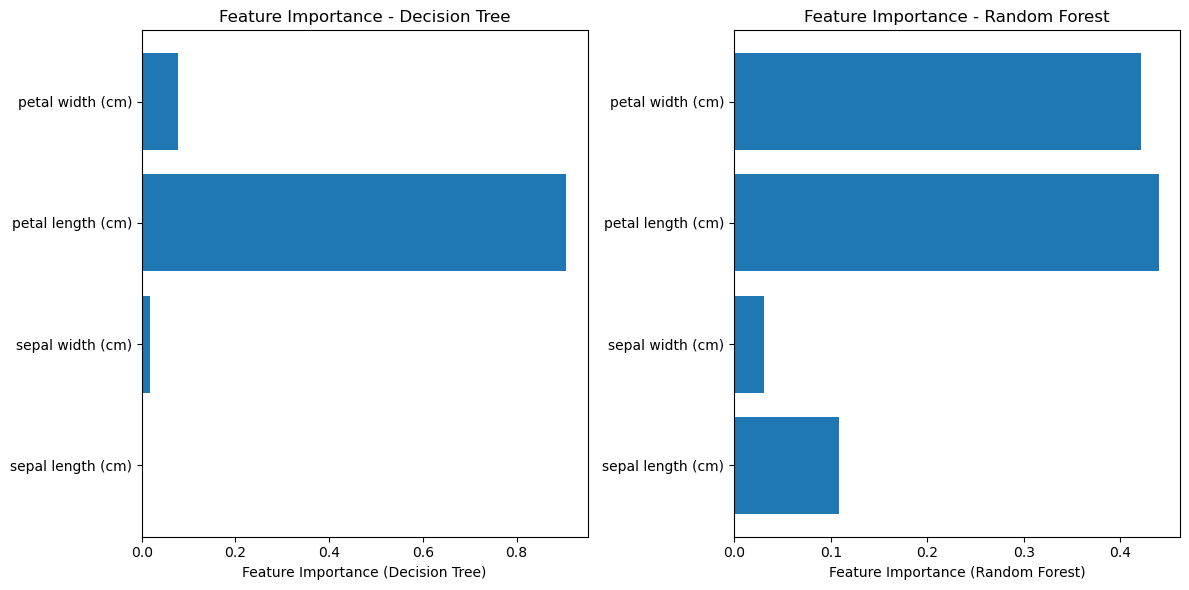

In [10]:
# Plotting feature importance for both models
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(X.columns, dt_feature_importance)
plt.xlabel('Feature Importance (Decision Tree)')
plt.title('Feature Importance - Decision Tree')

plt.subplot(1, 2, 2)
plt.barh(X.columns, rf_feature_importance)
plt.xlabel('Feature Importance (Random Forest)')
plt.title('Feature Importance - Random Forest')

plt.tight_layout()
plt.show()
